## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [53]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

#Plot per column distibution

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow, bar_color='skyblue', hist_color='orange'):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # filter for columns with a reasonable number of unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # make sure it's an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        # Use bar color for categorical data
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color=bar_color)  # Specify bar color
        else:
            # Use hist color for numeric data
            columnDf.hist(color=hist_color)  # Specify histogram color
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


#Correlation Matrix

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plotSpecificCorrelationMatrix(df, columns, graphWidth, cmap='coolwarm'):
    # Select the specified columns from the dataframe
    df_selected = df[columns].dropna(axis='columns')  # Drop columns with NaN values
    
    # Check if there are at least 2 columns to create a correlation matrix
    if df_selected.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_selected.shape[1]}) is less than 2')
        return
    
    # Compute the correlation matrix
    corr = df_selected.corr()
    
    # Plot the correlation matrix as a heatmap
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(corr, interpolation='nearest', cmap=cmap)  # Use the specified colormap
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar()
    plt.title(f'Correlation Matrix for {", ".join(columns)}', fontsize=15)
    plt.show()


#Scatter plot matrix

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotScatterMatrix(df, plotSize, textSize, scatter_color='red', hist_color='orange'):
    # Keep only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Remove columns with NaN values
    df_numeric = df_numeric.dropna(axis='columns')
    
    # Keep only columns with more than 1 unique value
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]
    
    # Limit the number of columns for better visualization
    columnNames = list(df_numeric)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df_numeric = df_numeric[columnNames]
    
    # Create scatter plot matrix, specify color and KDE color using hist_kwds
    ax = pd.plotting.scatter_matrix(df_numeric, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde',
                                    color=scatter_color, hist_kwds={'color': hist_color})
    
    # Compute correlations to annotate the scatter plots
    corrs = df_numeric.corr().values
    
    # Annotate each plot with the correlation coefficient
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    # Add title to the plot
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/facebook-fact-check.csv

In [59]:
nRowsRead = None # specify 'None' if want to read whole file
# facebook-fact-check.csv has 2282 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:\\Users\\saiya\\Downloads\\facebook-fact-check.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'facebook-fact-check.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2282 rows and 12 columns


Let's take a quick look at what the data looks like:

In [60]:
df1.head(5)

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


Distribution graphs (histogram/bar graph) of sampled columns:

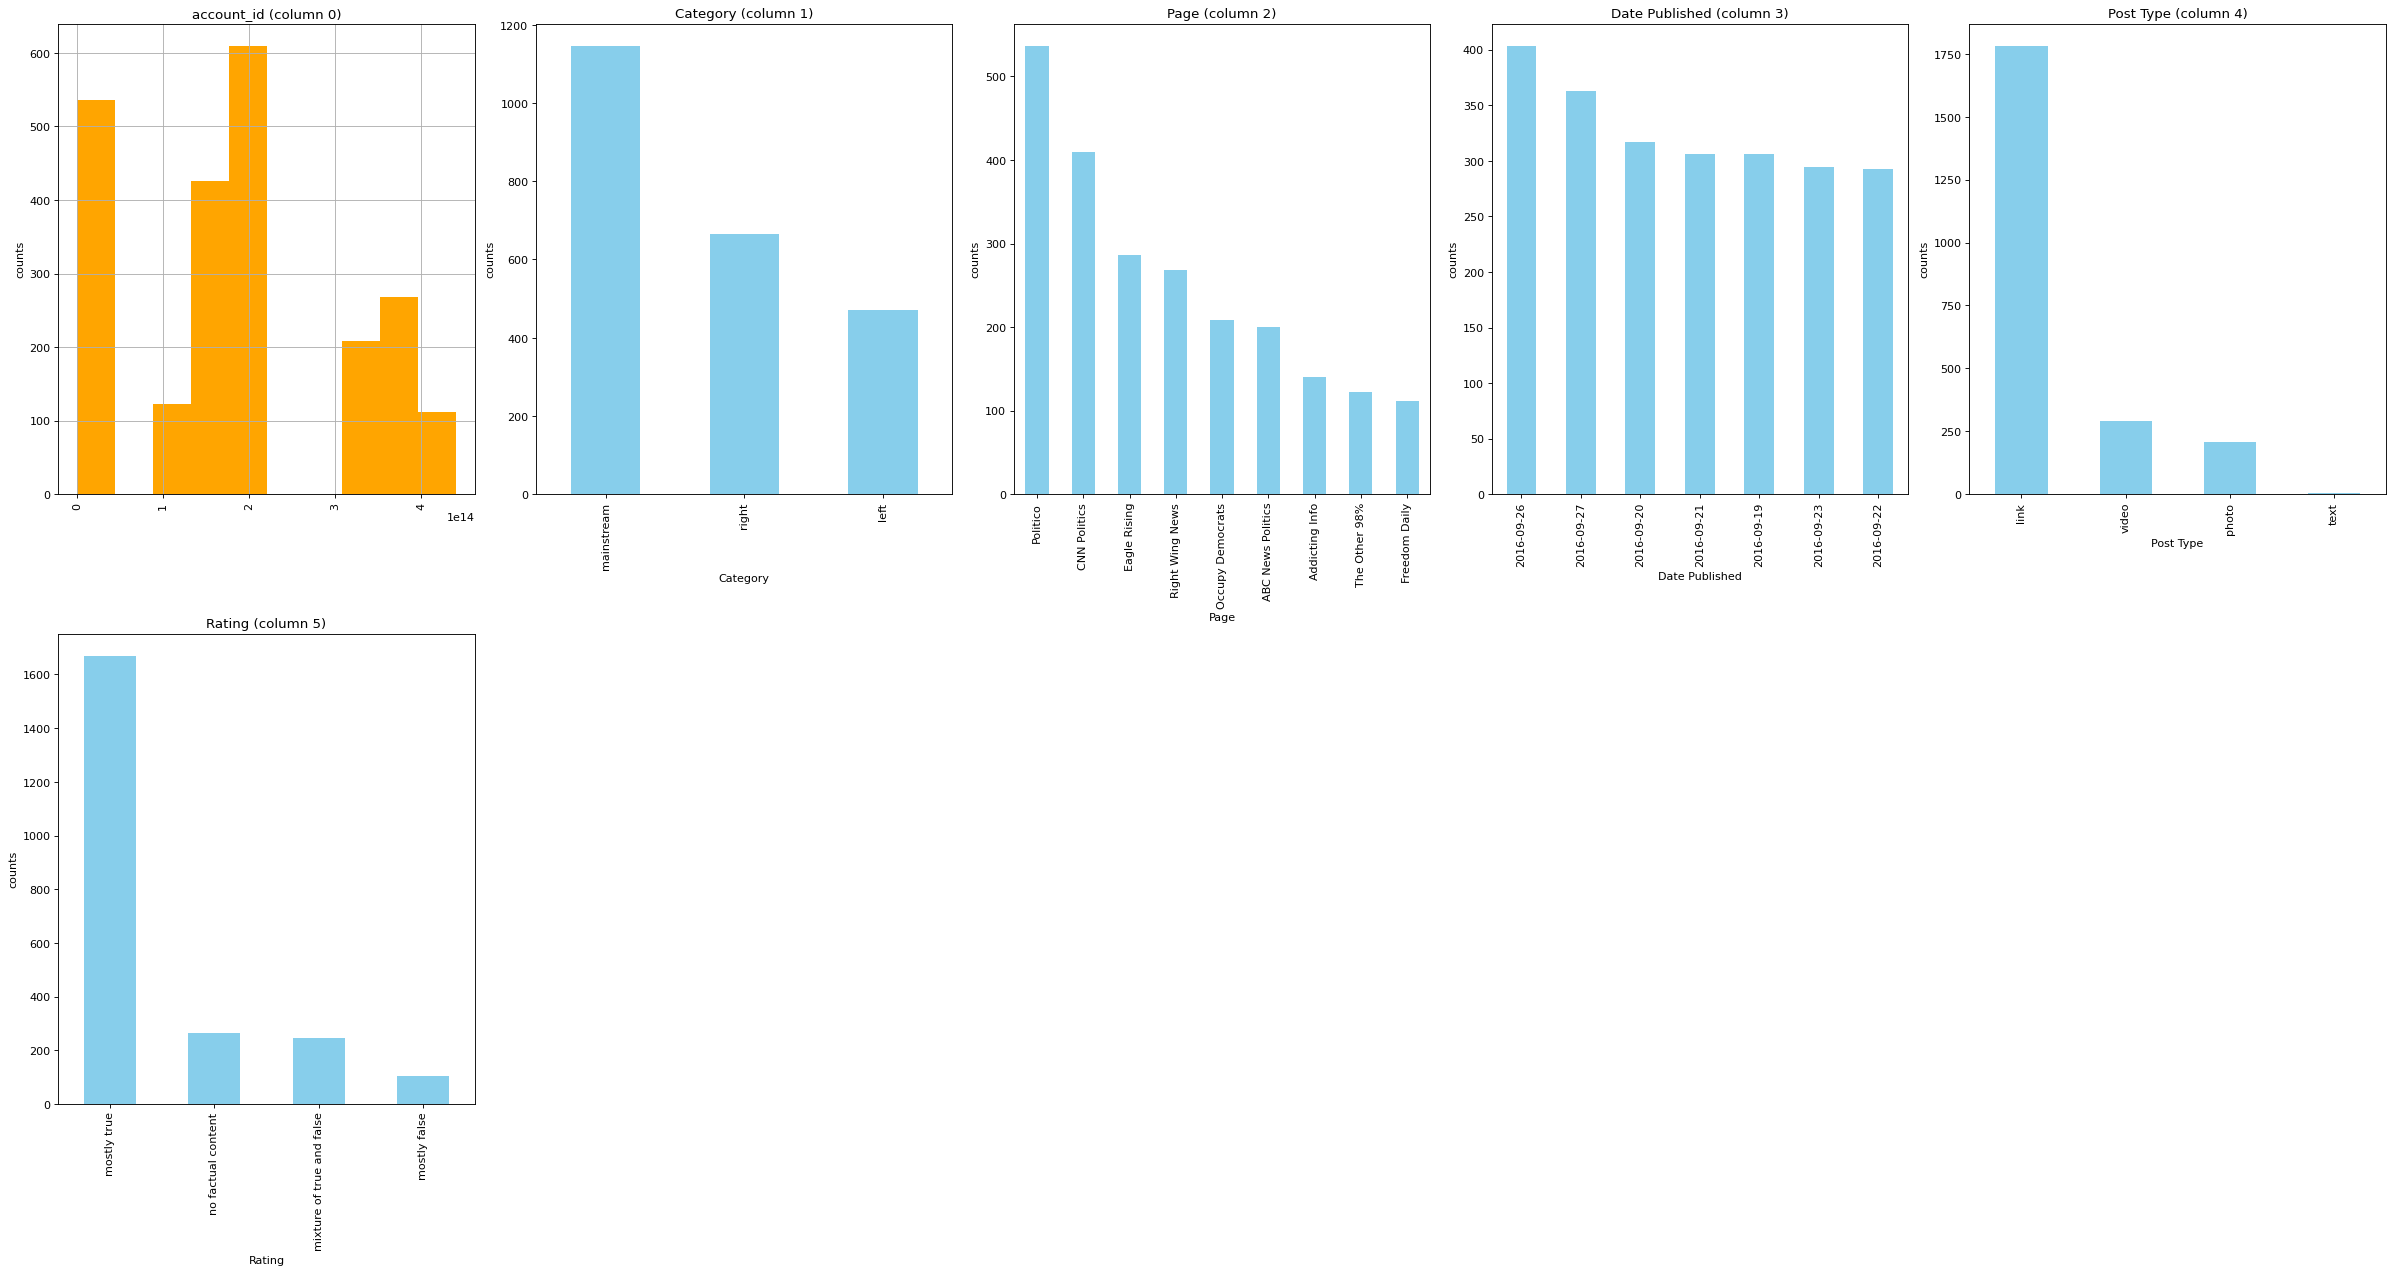

In [61]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [62]:
# Check the data types of the relevant columns
print(df1[['reaction_count', 'comment_count']].dtypes)

# Check for missing values in these columns
print(df1[['reaction_count', 'comment_count']].isnull().sum())


reaction_count    float64
comment_count     float64
dtype: object
reaction_count    2
comment_count     2
dtype: int64


In [63]:
# Fill missing values with 0
df1[['reaction_count', 'comment_count']] = df1[['reaction_count', 'comment_count']].fillna(0)



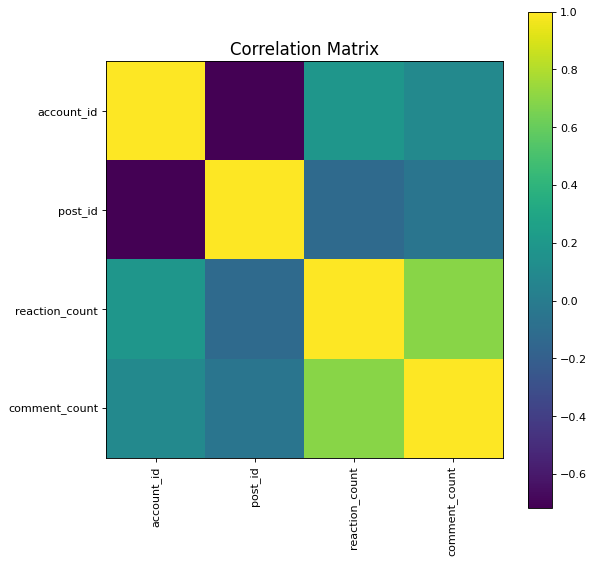

In [64]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

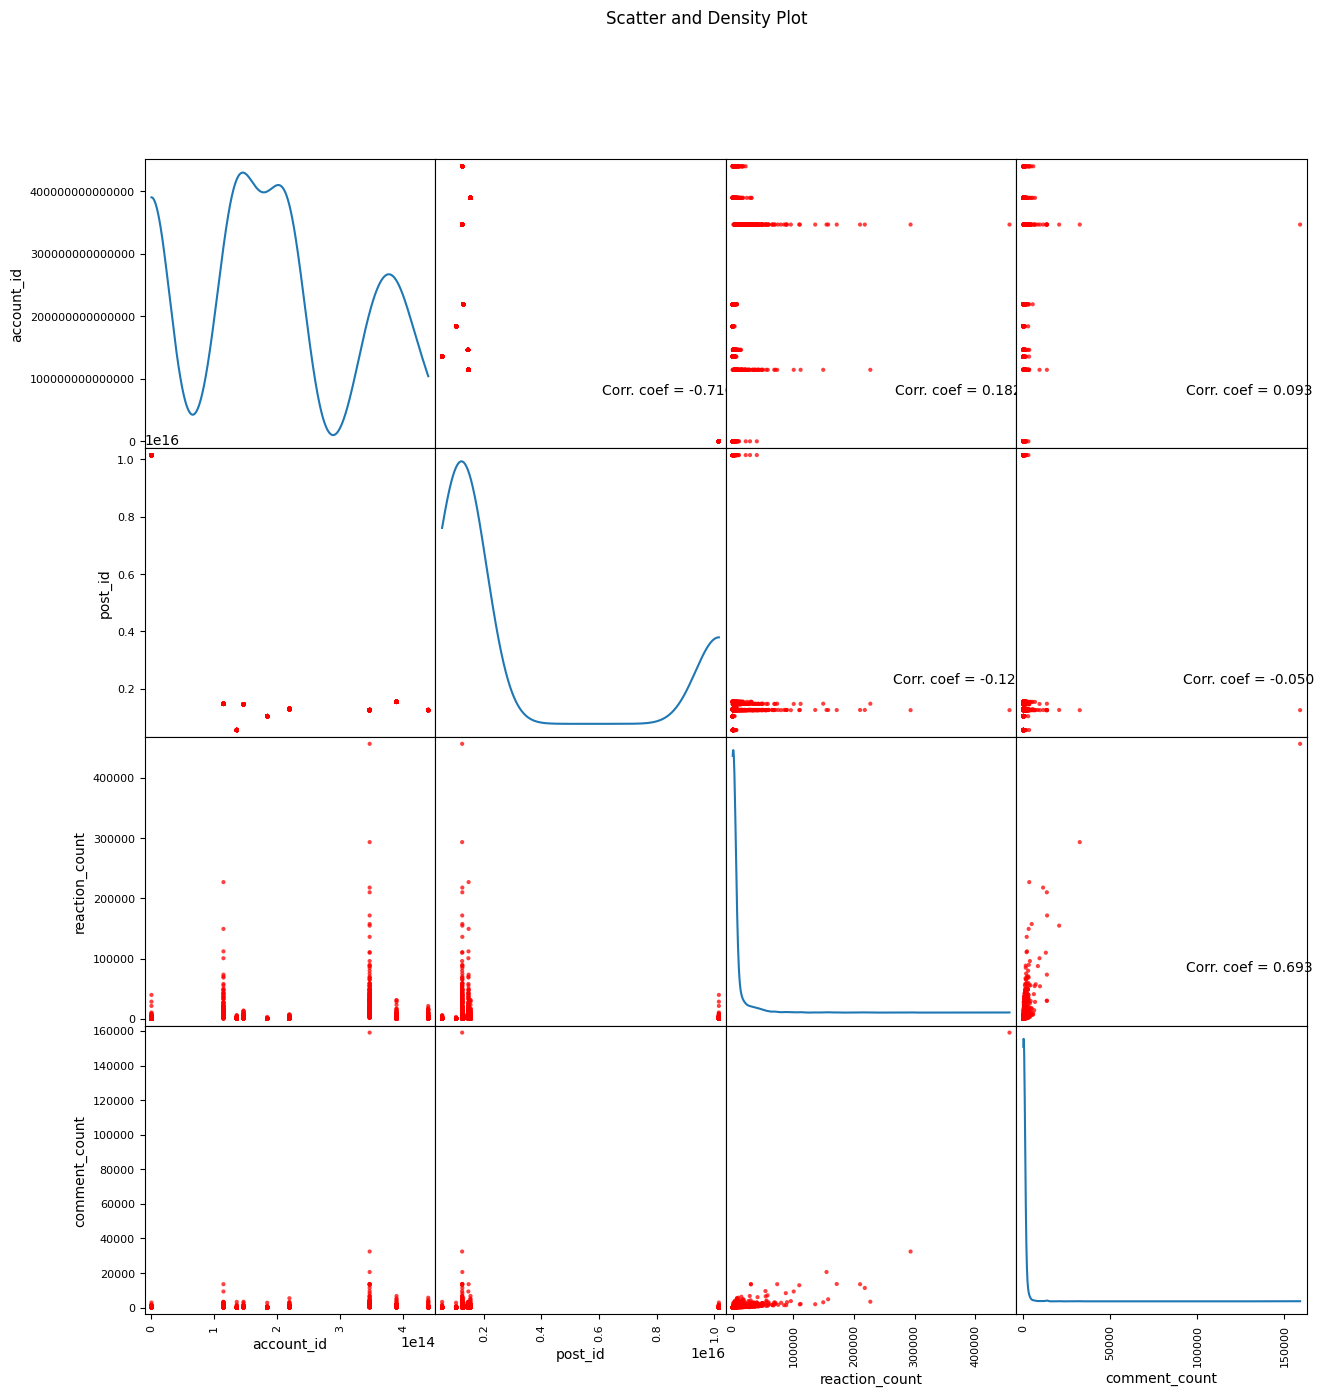

In [65]:
plotScatterMatrix(df1, 15, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!